<a href="https://colab.research.google.com/github/giramos/Machine-Learning/blob/master/EjerciciosPreparatorios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparación Cuestionario 💣
Ejercicios propuestos para preparación a un futuro cuestionario. Son ejemplos de lo visto en prácticas

## 1. Ejemplo
En este ejercicio se proporciona el conjunto de datos de
entrenamiento datos_entrenamiento_ssii.csv sobre el cual
ya se han aplicado todas las fases de preprocesamiento
necesarias. Utiliza este conjunto de datos para entrenar
modelos usando el algoritmo de los vecinos de cercanos
probando distintas combinaciones de números de vecinos
y distancias. En concreto, prueba todas las posibles
combinaciones formadas con los números de vecinos 3, 7,
y 11 y las distancias Manhattan y Euclídea. Para cada
combinación de parámetros utiliza GridSearchCV para
obtener los resultados de la accuracy en validación cruzada
empleando 10 cajas. Observa los resultados del modelo
entrenado con 3 vecinos y la distancia Manhattan: ¿Cuál es
el valor de la accuracy obtenida al validar el modelo
utilizando la caja con id 8 y el resto de cajas para entrenar?

### **ChatGPT Solución**

In [73]:
# Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Cargar los datos (se asume que el dataset está preprocesado y listo para usar)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/datos_entrenamiento_ssii (1).csv')

# Separar las variables predictoras (X) y las etiquetas (y)
#X = df.drop(columns=["Etiqueta"])  # Reemplaza "Etiqueta" con el nombre de la columna de etiquetas
#y = df["Etiqueta"]
X = df.drop(columns=["Clase"])  # Reemplaza "Etiqueta" con el nombre de la columna de etiquetas
y = df["Clase"]

# Configuración de parámetros para KNN
param_grid = {
    "n_neighbors": [3, 7, 11],
    "metric": ["manhattan", "euclidean"]
}

# Crear el modelo
knn = KNeighborsClassifier()

# Configurar GridSearchCV con validación cruzada de 10 folds
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(knn, param_grid, cv=cv, scoring="accuracy", return_train_score=True)

# Entrenar y realizar validación cruzada
grid_search.fit(X, y)

# Mostrar los resultados generales del GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)
print("Resultados de GridSearchCV:")
print(results[["param_n_neighbors", "param_metric", "mean_test_score", "std_test_score"]])

# Analizar el modelo con 3 vecinos y distancia Manhattan
specific_model = results[
    (results["param_n_neighbors"] == 3) & (results["param_metric"] == "manhattan")
]

# Mostrar las métricas de validación cruzada
print("\nResultados del modelo con 3 vecinos y distancia Manhattan:")
print(specific_model[["mean_test_score", "std_test_score"]])

# Extraer resultados por fold usando StratifiedKFold
cv_split = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
accuracy_fold = []

for train_index, test_index in cv_split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrenar con los datos de entrenamiento
    model = KNeighborsClassifier(n_neighbors=3, metric="manhattan")
    model.fit(X_train, y_train)

    # Evaluar con los datos de test (fold específico)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_fold.append(accuracy)

# Mostrar el resultado del fold con ID 8
print(f"\nAccuracy en el fold 8: {accuracy_fold[7]:.4f}")  # Recordar que los índices comienzan en 0


Resultados de GridSearchCV:
   param_n_neighbors param_metric  mean_test_score  std_test_score
0                  3    manhattan         0.823077        0.070115
1                  7    manhattan         0.879487        0.066974
2                 11    manhattan         0.807692        0.083383
3                  3    euclidean         0.864103        0.069739
4                  7    euclidean         0.871154        0.041390
5                 11    euclidean         0.855769        0.061968

Resultados del modelo con 3 vecinos y distancia Manhattan:
   mean_test_score  std_test_score
0         0.823077        0.070115

Accuracy en el fold 8: 0.8333


### **Copilot Solución**

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# 1. Carga el conjunto de datos y define los parámetros:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/datos_entrenamiento_ssii (1).csv')
X = data.drop('Clase', axis=1)
y = data['Clase']

param_grid = {
    'n_neighbors': [3, 7, 11],  # Valores de vecinos
    'p': [1, 2]  # Distancias Manhattan (1) y Euclídea (2)
}

# 2. Divide el conjunto de datos en entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Crea un modelo KNN e inicializa GridSearchCV:
knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(knn_model, param_grid, cv=10, scoring='accuracy')

# 4. Entrena el modelo y observa los resultados:
grid_search.fit(X_train, y_train.values.ravel())

# 5. Encuentra el valor de la accuracy para la caja 8:
results_df = pd.DataFrame(grid_search.cv_results_)
accuracy_split8 = results_df[
    (results_df['param_n_neighbors'] == 3) & (results_df['param_p'] == 1)
]['split8_test_score'].values[0]

print(f"La accuracy en la caja 8 con 3 vecinos y distancia Manhattan es: {accuracy_split8:.2f}")

La accuracy en la caja 8 con 3 vecinos y distancia Manhattan es: 0.80


### **`NoteBook Solución`**


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Carga el conjunto de datos y define los parámetros:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/datos_entrenamiento_ssii (1).csv')
X = data.drop('Clase', axis=1)
y = data['Clase']

param_grid = {
    'n_neighbors': range(1,4),  # Ejemplo de valores válidos
    'p': [1, 4, 5]  # Distancias Manhattan y Euclídea
}

# 2. Divide el conjunto de datos en entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Crea un modelo KNN e inicializa GridSearchCV:
knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(knn_model, param_grid, cv=10, scoring='accuracy')

# 4. Entrena el modelo y observa los resultados:
grid_search.fit(X_train, y_train.values.ravel())
print(grid_search.cv_results_)

# 5. Encuentra el valor de la accuracy para la caja 8:
results_df = pd.DataFrame(grid_search.cv_results_)
accuracy_split8 = results_df[
    (results_df['param_n_neighbors'] == 3) & (results_df['param_p'] == 1)
]['split8_test_score'].values

print(f"La accuracy en la caja 8 con 3 vecinos y distancia Manhattan es: {accuracy_split8}")



{'mean_fit_time': array([0.00200284, 0.00187595, 0.00195441, 0.0023396 , 0.00226429,
       0.00199742, 0.0020313 , 0.00209563, 0.00224156]), 'std_fit_time': array([1.23204482e-04, 5.60315162e-05, 2.01912054e-04, 6.32475286e-04,
       7.67925313e-04, 1.44497584e-04, 1.48635865e-04, 2.90543420e-04,
       4.16299783e-04]), 'mean_score_time': array([0.00356731, 0.00396011, 0.00402815, 0.00450921, 0.00438499,
       0.00408599, 0.00379322, 0.00434594, 0.00458481]), 'std_score_time': array([0.00017291, 0.00014073, 0.00045283, 0.00107665, 0.00073059,
       0.00019599, 0.00025812, 0.00058594, 0.00084898]), 'param_n_neighbors': masked_array(data=[1, 1, 1, 2, 2, 2, 3, 3, 3],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value=999999), 'param_p': masked_array(data=[1, 4, 5, 1, 4, 5, 1, 4, 5],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value=999999), 'param

### **Gemini solución**

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler  # Para escalar los datos si es necesario

# Cargar los datos
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/datos_entrenamiento_ssii (1).csv')

# Separar las características (X) y la variable objetivo (y)
X = data.drop('Clase', axis=1)
y = data['Clase']

# Escalar los datos (opcional, si las características tienen escalas muy diferentes)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Definir los parámetros a probar
param_grid = {
    'n_neighbors': [3, 7, 11],
    'metric': ['manhattan', 'euclidean']
}

# Fijar la semilla aleatoria para reproducibilidad
random_state = 42

# Mezclar los datos aleatoriamente
data = data.sample(frac=1, random_state=random_state)

# Dividir el conjunto de datos en entrenamiento y prueba (opcional, si quieres evaluar en un conjunto de prueba independiente)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)

# Crear el modelo KNN
knn = KNeighborsClassifier()

# Utilizar GridSearchCV con 10-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obtener los resultados
results = pd.DataFrame(grid_search.cv_results_)

# Encontrar la accuracy para 3 vecinos y distancia Manhattan en la caja 8
accuracy_caja8 = results[(results['param_n_neighbors'] == 3) &
                         (results['param_metric'] == 'manhattan')]['split8_test_score'].values[0]

print(f"Accuracy para 3 vecinos y distancia Manhattan en la caja 8: {accuracy_caja8}")

# Evaluar en el conjunto de prueba (opcional)
if X_test is not None:
    y_pred = grid_search.best_estimator_.predict(X_test)
    print(f"Accuracy en el conjunto de prueba: {accuracy_score(y_test, y_pred)}")

Accuracy para 3 vecinos y distancia Manhattan en la caja 8: 0.8
Accuracy en el conjunto de prueba: 0.8


## 2. Ejemplo
En este ejercicio se proporciona el conjunto de datos de
entrenamiento datos_entrenamiento_ssii.csv sobre el cual
ya se han aplicado todas las fases de preprocesamiento
necesarias. Utiliza este conjunto de datos para entrenar
modelos usando el algoritmo de los vecinos de cercanos
probando distintas combinaciones de números de vecinos
y distancias. En concreto, prueba todas las posibles
combinaciones formadas con los números de vecinos 3, 7,
y 11 y las distancias Manhattan y Euclídea. Para cada
combinación de parámetros utiliza GridSearchCV para
obtener los resultados de la accuracy en validación cruzada
empleando 10 cajas. Observa los resultados del modelo
entrenado con 7 vecinos y la distancia Manhattan: ¿Cuál es
el valor de la accuracy obtenida al validar el modelo
utilizando la caja con id 4 y el resto de cajas para entrenar?

### **Copilot Solución**

In [59]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Cargar los datos
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/datos_entrenamiento_ssii (1).csv')

# Separar las características de la etiqueta
X = df.drop('Clase', axis=1)
y = df['Clase']

# Definir los parámetros para GridSearchCV
param_grid = {
    'n_neighbors': [3, 7, 11],
    'p': [1, 2]  # 1 para Manhattan, 2 para Euclídea
}

# Crear el modelo KNN
model = KNeighborsClassifier()

# Configurar GridSearchCV con validación cruzada de 10 folds
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')

# Entrenar el modelo
grid_search.fit(X, y)

# Obtener los resultados de la validación cruzada
results = grid_search.cv_results_

# Convert the results to a pandas DataFrame for easier indexing
results_df = pd.DataFrame(results)

# Obtener el valor de la accuracy para el modelo con 7 vecinos y distancia Manhattan en la caja con id 4
split4_test_score = results_df.loc[
    (results_df['param_n_neighbors'] == 7) & (results_df['param_p'] == 1),
    'split4_test_score'
].values[0]

print(f"Accuracy en la caja con id 4 para 7 vecinos y distancia Manhattan: {split4_test_score}")

Accuracy en la caja con id 4 para 7 vecinos y distancia Manhattan: 1.0


### **Solución Gemini**

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Cargar los datos
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/datos_entrenamiento_ssii (1).csv')

# Separar las características (X) y la variable objetivo (y)
X = data.drop('Clase', axis=1)  # Suponiendo que la columna objetivo se llama 'Clase'
y = data['Clase']

# Escalar los datos (opcional, si las características tienen escalas muy diferentes)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Definir los parámetros a probar
param_grid = {
    'n_neighbors': [3, 7, 11],
    'metric': ['manhattan', 'euclidean']
}

# Fijar la semilla aleatoria para reproducibilidad
random_state = 42

# Mezclar los datos aleatoriamente
data = data.sample(frac=1, random_state=random_state)

# Crear el modelo KNN
knn = KNeighborsClassifier()

# Utilizar GridSearchCV con 10-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X, y)

# Obtener los resultados
results = pd.DataFrame(grid_search.cv_results_)

# Encontrar la accuracy para 7 vecinos y distancia Manhattan en la caja 4
accuracy_caja4 = results[(results['param_n_neighbors'] == 7) &
                         (results['param_metric'] == 'manhattan')]['split4_test_score'].values[0]  # split3 corresponde a la caja 4

print(f"Accuracy para 7 vecinos y distancia Manhattan en la caja 4: {accuracy_caja4}")

Accuracy para 7 vecinos y distancia Manhattan en la caja 4: 1.0


## **Solución notebook**

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Carga el conjunto de datos y define los parámetros:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/datos_entrenamiento_ssii (1).csv')

# 2. Separar las características de la etiqueta
X = df.drop('Clase', axis=1)
y = df['Clase']

# 3. Definir los parámetros para GridSearchCV
param_grid = {
    'n_neighbors': [1, 3, 7],
    'p': [1, 2]  # 1 para Manhattan
}

# 4. Crear el modelo KNN
model = KNeighborsClassifier()

# 5. Configurar GridSearchCV con validación cruzada de 10 folds
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')

# 6. Entrenar el modelo
grid_search.fit(X, y)

# 7. Obtener los resultados de la validación cruzada
results = grid_search.cv_results_

# 8. Convertir los resultados a un DataFrame de pandas
results_df = pd.DataFrame(results)

# 9. Obtener el valor de la accuracy para la caja con id 4
split4_test_score = results_df['split4_test_score'].values

print(f"Accuracy en la caja con id 4 para 7 vecinos y distancia Manhattan: {split4_test_score}")

Accuracy en la caja con id 4 para 7 vecinos y distancia Manhattan: [0.92307692 0.84615385 1.         1.         1.         1.        ]


### **ChatGPT Solución**

In [69]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Cargar los datos
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/datos_entrenamiento_ssii (1).csv')

# Separar características (X) y etiquetas (y)
X = df.drop("Clase", axis=1)  # Cambia 'Clase' por el nombre real de la columna objetivo
y = df["Clase"]

# Escalar características (opcional, útil si las variables tienen escalas distintas)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definir los parámetros para GridSearchCV
param_grid = {
    "n_neighbors": [3, 7, 11],  # Vecinos
    "metric": ["manhattan", "euclidean"],  # Distancias
}

# Crear el modelo KNN
knn = KNeighborsClassifier()

# Configurar GridSearchCV con validación cruzada de 10 folds
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring="accuracy", return_train_score=True)
grid_search.fit(X_scaled, y)

# Convertir resultados a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Crear una tabla con las métricas principales
summary_table = results[[
    "param_n_neighbors", "param_metric", "mean_test_score", "std_test_score"
]].sort_values(by="mean_test_score", ascending=False)

# Mostrar la tabla general
print("Resultados de GridSearchCV:")
print(summary_table)

# Filtrar resultados del modelo específico: 7 vecinos y distancia Manhattan
specific_model = summary_table[
    (results["param_n_neighbors"] == 7) & (results["param_metric"] == "manhattan")
]

print("\nResultados del modelo con 7 vecinos y distancia Manhattan:")
print(specific_model[["mean_test_score", "std_test_score"]])

# Obtener la accuracy específica para el fold 4
accuracy_caja4 = results.loc[
    (results["param_n_neighbors"] == 7) & (results["param_metric"] == "manhattan"),
    "split4_test_score"
].values[0]

# Mostrar el resultado específico
print(f"\nAccuracy en el fold 4: {accuracy_caja4:.4f}")


Resultados de GridSearchCV:
   param_n_neighbors param_metric  mean_test_score  std_test_score
1                  7    manhattan         0.848077        0.103165
5                 11    euclidean         0.823718        0.155658
2                 11    manhattan         0.815385        0.137598
4                  7    euclidean         0.808333        0.124017
3                  3    euclidean         0.791026        0.142394
0                  3    manhattan         0.761538        0.154959

Resultados del modelo con 7 vecinos y distancia Manhattan:
   mean_test_score  std_test_score
1         0.848077        0.103165

Accuracy en el fold 4: 1.0000


<ipython-input-69-129dfb902da8>:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  specific_model = summary_table[


## 3. Ejemplo
Considera la siguiente salida de código. Realiza una
comparación de los dos modelos obtenidos contestando
cuestiones como por ejemplo ¿hay sobreajuste en alguno
de ellos?, ¿qué impacto tiene la poda?, ¿sería necesario
podar más?, ¿elegirías algún parámetro más, y en caso
afirmativo qué otros parámetros y por qué?

```
## ÁRBOL SIN PODA
## Accuracy train sin poda: 1.00
## Accuracy validación cruzada sin poda (media = 0.91)
## [0.88 0.96 0.88 0.92 0.92]
## Accuracy test sin poda: 0.91
##
## ÁRBOL CON PODA
## Parámetros del árbol (elegidos {'max_depth': 3,
'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0})
## Accuracy train con poda: 0.97
## Accuracy validación cruzada con poda (media = 0.92)
## [0.88, 0.96, 0.92, 0.92, 0.92]
## Accuracy test con poda: 0.91
##
## Árboles resultantes
##
## ÁRBOL SIN PODA
## |--- 3 <= 0.16
## |   |--- 18 <= -1.42
## |   |   |--- 3 <= -0.88
## |   |   |   |--- class: 0
## |   |   |--- 3 >  -0.88
## |   |   |   |--- class: 1
## |   |--- 18 >  -1.42
## |   |   |--- 19 <= -2.32
## |   |   |   |--- class: 1
## |   |   |--- 19 >  -2.32
## |   |   |   |--- 6 <= 0.99
## |   |   |   |   |--- class: 0
## |   |   |   |--- 6 >  0.99
## |   |   |   |   |--- 13 <= -0.68
## |   |   |   |   |   |--- class: 1
## |   |   |   |   |--- 13 >  -0.68
## |   |   |   |   |   |--- class: 0
## |--- 3 >  0.16
## |   |--- 7 <= 1.97
## |   |   |--- class: 1
## |   |--- 7 >  1.97
## |   |   |--- class: 0
##
## ÁRBOL CON PODA
## |--- 3 <= 0.16
## |   |--- 18 <= -1.42
## |   |   |--- class: 1
## |   |--- 18 >  -1.42
## |   |   |--- 19 <= -2.32
## |   |   |   |--- class: 1
## |   |   |--- 19 >  -2.32
## |   |   |   |--- class: 0
## |--- 3 >  0.16
## |   |--- 4 <= 2.14
## |   |   |--- class: 1
## |   |--- 4 >  2.14
## |   |   |--- class: 0
```







### **Copilot Solución**

Comparación de los Modelos de Árbol de Decisión
1. **¿Hay sobreajuste en alguno de ellos?**
+ *Árbol sin poda*: Sí, hay sobreajuste. Esto se observa porque la accuracy en el conjunto de entrenamiento es 1.00, mientras que en el conjunto de test es 0.91. La diferencia indica que el modelo se ajusta demasiado bien a los datos de entrenamiento, pero no generaliza tan bien a los datos de test.
+ *Árbol con poda:* También hay sobreajuste, aunque es menor. La accuracy en el conjunto de entrenamiento es 0.97, mientras que en el conjunto de test es 0.91. La poda ha reducido el sobreajuste, pero no lo ha eliminado por completo.
2. **¿Qué impacto tiene la poda?**
+ *Accuracy en entrenamiento:* La poda reduce la accuracy en el conjunto de entrenamiento de 1.00 a 0.97, lo que indica que el modelo es menos complejo y menos ajustado a los datos de entrenamiento.
+ *Accuracy en validación cruzada:* La poda mejora ligeramente la accuracy media en validación cruzada de 0.91 a 0.92, lo que sugiere que el modelo generaliza mejor.
+ *Accuracy en test:* La accuracy en el conjunto de test se mantiene igual en 0.91, lo que indica que la poda no ha afectado negativamente la capacidad del modelo para generalizar a nuevos datos.
3. **¿Sería necesario podar más?**
No parece necesario podar más. La poda actual ha reducido el sobreajuste y ha mejorado la accuracy en validación cruzada sin afectar negativamente la accuracy en el conjunto de test. Podar más podría llevar a un modelo subajustado, que no capture suficientemente bien los patrones en los datos.

**4. ¿Elegirías algún parámetro más, y en caso afirmativo qué otros parámetros y por qué?**
Sí, se podrían considerar los siguientes parámetros adicionales para mejorar aún más el modelo:

+ *ccp_alpha:* Este parámetro controla la complejidad del árbol mediante la poda de costo-complejidad. Ayuda a encontrar un balance óptimo entre la complejidad del modelo y su capacidad de generalización.
+ *min_samples_leaf*: Define el número mínimo de muestras que debe tener un nodo hoja. Ayuda a evitar que el modelo se ajuste demasiado a los datos de entrenamiento.
+ *criterion:* Permite elegir el criterio para medir la calidad de una división (por ejemplo, "gini" o "entropy"). Diferentes criterios pueden afectar la estructura del árbol y su rendimiento.
+ *max_leaf_nodes:* Limita el número máximo de nodos hoja en el árbol. Ayuda a controlar la complejidad del modelo y a prevenir el sobreajuste.

**Resumen**

+ *Sobreajuste:* Ambos modelos presentan sobreajuste, aunque es menor en el árbol con poda.
+ *Impacto de la poda:* La poda reduce la complejidad del modelo, mejora la accuracy en validación cruzada y mantiene la accuracy en test.
+ *Necesidad de más poda:* No parece necesario podar más, ya que la poda actual ha logrado un buen balance.
+ *Parámetros adicionales:* Se podrían considerar ccp_alpha, min_samples_leaf, criterion y max_leaf_nodes para mejorar aún más el modelo.

### **Gemini Solución**

**¿Hay sobreajuste en alguno de ellos?**

+ *Árbol sin poda:* Definitivamente sí. La precisión en el conjunto de entrenamiento es del 100%, lo que indica que el modelo ha memorizado los datos de entrenamiento y es muy probable que no generalice bien a nuevos datos. Esto es un claro signo de sobreajuste.
+ *Árbol con poda:* No se observa un sobreajuste tan evidente. La precisión en el conjunto de entrenamiento ha disminuido ligeramente, pero la precisión en la validación cruzada y en el conjunto de prueba se ha mantenido estable. Esto sugiere que la poda ha ayudado a regularizar el modelo y evitar el sobreajuste.
¿Qué impacto tiene la poda?

**La poda tiene un impacto significativo en el modelo:**

+ *Reduce la complejidad del árbol:* Al eliminar ramas y hojas innecesarias, el árbol se vuelve más simple y fácil de interpretar.
+ *Mejora la generalización:* Al reducir la complejidad, el modelo es menos propenso a sobreajustarse y puede generalizar mejor a nuevos datos.
+ *Puede reducir el tiempo de entrenamiento y predicción:* Los árboles más pequeños son más eficientes computacionalmente.
**¿Sería necesario podar más?**

La necesidad de podar más dependerá de varios factores:

Desempeño en el conjunto de prueba: Si la precisión en el conjunto de prueba sigue siendo alta y no hay signos de sobreajuste, podría no ser necesario podar más.
Complejidad del problema: Para problemas más complejos, puede ser necesario podar más agresivamente para evitar el sobreajuste.
Interpretabilidad: Si la interpretabilidad del modelo es importante, podar más puede ayudar a obtener un árbol más simple y fácil de entender.
*En este caso particular, parece que la poda ha sido suficiente para obtener un buen rendimiento. Sin embargo, siempre es recomendable explorar diferentes niveles de poda para encontrar el mejor compromiso entre precisión y complejidad.*

**¿Elegirías algún parámetro más, y en caso afirmativo qué otros parámetros y por qué?**

Sí, existen otros parámetros que podrían ajustarse para mejorar el rendimiento del modelo:

+ *criterion:* Esta opción determina la función de impureza utilizada para evaluar la calidad de una división. Las opciones más comunes son "gini" y "entropy". La elección puede afectar ligeramente la estructura del árbol.
+ *splitter:* Este parámetro controla la estrategia utilizada para seleccionar el mejor atributo para dividir un nodo. Las opciones más comunes son "best" y "random". "Best" selecciona el mejor atributo en cada división, mientras que "random" selecciona un atributo aleatorio de un subconjunto de atributos.
+ *class_weight:* Si las clases están desbalanceadas, se puede utilizar este parámetro para asignar pesos diferentes a las clases y evitar que la mayoría se imponga.
+ *min_samples_leaf:* Este parámetro especifica el número mínimo de muestras requeridas en cada hoja. Un valor más alto puede ayudar a prevenir el sobreajuste.
La elección de estos parámetros dependerá de las características específicas del conjunto de datos y del problema a resolver. Se recomienda realizar una búsqueda de hiperparámetros para encontrar la mejor combinación de valores.

En resumen, la poda ha sido fundamental para mejorar el rendimiento del modelo en este caso. Sin embargo, siempre es recomendable explorar diferentes configuraciones y evaluar el rendimiento del modelo en un conjunto de validación para tomar decisiones informadas.

### **ChatGPT Solución**

**1. ¿Hay sobreajuste en alguno de los modelos?**
+ *Árbol sin poda:*
-+ Accuracy en entrenamiento: 1.00 (perfecto ajuste).
++ Accuracy en validación cruzada: Media = 0.91, con variaciones entre folds [0.88,0.96,0.88,0.92,0.92]
[0.88,0.96,0.88,0.92,0.92].
++ Accuracy en test: 0.91.
++ Indicador de sobreajuste: La diferencia entre el rendimiento en entrenamiento (1.00) y validación cruzada (0.91) sugiere un posible sobreajuste. El modelo está memorizando los datos del entrenamiento en lugar de generalizar.
+ Árbol con poda:
++ Accuracy en entrenamiento: 0.97 (ligeramente menor que el árbol sin poda).
++ Accuracy en validación cruzada: Media = 0.92, con variaciones menores [0.88,0.96,0.92,0.92,0.92]
[0.88,0.96,0.92,0.92,0.92].
++ Accuracy en test: 0.91.
++ Indicador de sobreajuste: No hay evidencia de sobreajuste. El modelo con poda logra casi el mismo rendimiento en validación cruzada y test que en entrenamiento, lo que indica que generaliza mejor.

**2. ¿Qué impacto tiene la poda?**
+ Efectos positivos:
La poda reduce la complejidad del árbol al limitar la profundidad (
𝑚
𝑎
𝑥
_
𝑑
𝑒
𝑝
𝑡
ℎ
=
3
max_depth=3) y las particiones pequeñas (
𝑚
𝑖
𝑛
_
𝑠
𝑎
𝑚
𝑝
𝑙
𝑒
𝑠
_
𝑠
𝑝
𝑙
𝑖
𝑡
=
10
min_samples_split=10).
+Esto mejora la capacidad del modelo para generalizar:
El rendimiento en validación cruzada mejora ligeramente (0.91 → 0.92 de media).
Se mantiene la misma precisión en el conjunto de test (0.91).
+ Efectos en la estructura:
++ Árbol sin poda: Es más profundo y tiene más ramas, lo que indica una mayor complejidad. Esto puede llevar a decisiones sobreajustadas basadas en ruido en los datos.
++ Árbol con poda: Es más compacto y toma decisiones basadas en características más relevantes. Esto reduce la posibilidad de sobreajuste.

**3. ¿Sería necesario podar más?**

Evaluación de la poda actual:

El modelo con poda ya muestra buen rendimiento en validación cruzada y test, sin evidencia de sobreajuste.
Una poda adicional (reduciendo aún más
𝑚
𝑎
𝑥
_
𝑑
𝑒
𝑝
𝑡
ℎ
max_depth o aumentando
𝑚
𝑖
𝑛
_
𝑠
𝑎
𝑚
𝑝
𝑙
𝑒
𝑠
_
𝑠
𝑝
𝑙
𝑖
𝑡
min_samples_split) podría degradar el rendimiento, ya que el modelo podría subajustar y no capturar relaciones importantes en los datos.
C*onclusión: No parece necesario podar más*. La configuración actual (
𝑚
𝑎
𝑥
_
𝑑
𝑒
𝑝
𝑡
ℎ
=
3
max_depth=3,
𝑚
𝑖
𝑛
_
𝑠
𝑎
𝑚
𝑝
𝑙
𝑒
𝑠
_
𝑠
𝑝
𝑙
𝑖
𝑡
=
10
min_samples_split=10) ofrece un buen balance entre simplicidad y rendimiento.

**4. ¿Elegirías algún parámetro más, y en caso afirmativo, qué otros parámetros y por qué?**

Sí, podríamos explorar ajustes adicionales para mejorar el rendimiento del modelo:

+ min_samples_leaf:

Define el número mínimo de muestras requeridas en una hoja. Aumentarlo podría reducir la cantidad de hojas con pocas observaciones, lo que haría el modelo más robusto.
+ max_features:

Limitar el número de características consideradas en cada división. Esto puede reducir la complejidad y mejorar la generalización, especialmente en datasets con muchas variables.
+ class_weight:

Ajustar los pesos de las clases en caso de desequilibrios en el dataset. Esto puede ayudar si una clase tiene significativamente más observaciones que otra.
+ ccp_alpha:

Controlar el costo de complejidad para la poda posterior al ajuste. Ajustar este parámetro permite explorar diferentes niveles de simplicidad del árbol.

**Conclusión:**
+ ¿Sobreajuste?

El árbol sin poda muestra indicios de sobreajuste.
El árbol con poda generaliza mejor y no muestra sobreajuste.
+ Impacto de la poda:

Reduce la complejidad, mejora la generalización y mantiene un rendimiento comparable en test.
+ ¿Podar más?

No es necesario. Más poda podría llevar a subajuste.
+ Parámetros adicionales:

Considerar
𝑚
𝑖
𝑛
_
𝑠
𝑎
𝑚
𝑝
𝑙
𝑒
𝑠
_
𝑙
𝑒
𝑎
𝑓
min_samples_leaf,
𝑚
𝑎
𝑥
_
𝑓
𝑒
𝑎
𝑡
𝑢
𝑟
𝑒
𝑠
max_features,
𝑐
𝑙
𝑎
𝑠
𝑠
_
𝑤
𝑒
𝑖
𝑔
ℎ
𝑡
class_weight, y
𝑐
𝑐
𝑝
_
𝑎
𝑙
𝑝
ℎ
𝑎
ccp_alpha para optimizar aún más el modelo.
El árbol con poda es claramente preferible en este caso debido a su equilibrio entre simplicidad y rendimiento.

## 4. Ejemplo
Considera la siguiente salida de código. Realiza una
comparación de los dos modelos obtenidos contestando
cuestiones como por ejemplo ¿hay sobreajuste en alguno
de ellos?, ¿qué impacto tiene la poda?, ¿sería necesario
podar más?, ¿elegirías algún parámetro más, y en caso
afirmativo qué otros parámetros y por qué?

```
## ÁRBOL SIN PODA
## Accuracy train sin poda: 1.00
## Accuracy validación cruzada sin poda (media = 0.90)
## [0.92 0.92 0.88 0.84 0.96]
## Accuracy test sin poda: 0.88
##
## ÁRBOL CON PODA
## Parámetros del árbol (elegidos {'max_depth': 3,
'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0})
## Accuracy train con poda: 0.96
## Accuracy validación cruzada con poda (media = 0.94)
## [0.96, 0.88, 0.96, 0.88, 1.0]
## Accuracy test con poda: 0.91
##
## Árboles resultantes
##
## ÁRBOL SIN PODA
## |--- 3 <= 0.29
## |   |--- 3 <= -0.71
## |   |   |--- 19 <= -2.40
## |   |   |   |--- class: 1
## |   |   |--- 19 >  -2.40
## |   |   |   |--- 11 <= 1.13
## |   |   |   |    |--- class: 0
## |   |   |   |--- 11 > 1.13
## |   |   |   |    |--- 14 <= -0.52
## |   |   |   |    |    |--- class: 0
## |   |   |   |    |--- 14 > -0.52
## |   |   |   |    |    |--- class: 1
## |   |--- 3 >  -0.71
## |   |   |--- 4  <=  1.07
## |   |   |   |--- 7  <=  -0.83
## |   |   |   |   |--- 2  <=  0.58
## |   |   |   |   |   |--- class: 0
## |   |   |   |   |--- 2  >  0.58
## |   |   |   |   |   |--- class: 1
## |   |   |   |--- 7  >  -0.83
## |   |   |   |   |--- class: 1
## |   |   |--- 4  >  1.07
## |   |   |   |--- class: 0
## |--- 3  > 0.29
## |   |--- class: 1
##
## ÁRBOL CON PODA
## |--- 3 <= 0.29
## |   |--- 3 <= -0.71
## |   |   |--- 19 <= -2.40
## |   |   |   |--- class: 1
## |   |   |--- 19  > -2.40
## |   |   |   |--- class: 0
## |   |--- 3  > -0.71
## |   |   |--- 4 <= 1.07
## |   |   |   |--- class: 1
## |   |   |--- 4 > 1.07
## |   |   |   |--- class: 0
## |--- 3 >  0.29
## |   |--- class: 1
```



### **ChatGPT Solución**

1**. ¿Hay sobreajuste en alguno de ellos?**

+ Árbol sin poda:
++ Accuracy en entrenamiento: 1.00 (perfecto ajuste).
++ Accuracy en validación cruzada (media): 0.90.
++ Los resultados por fold
[0.92,0.92,0.88,0.84,0.96]
[0.92,0.92,0.88,0.84,0.96] muestran variaciones significativas entre folds.
++ Accuracy en test: 0.88, más bajo que en validación cruzada y entrenamiento.

**Conclusión**: Hay evidencia clara de sobreajuste. El modelo memoriza perfectamente los datos de entrenamiento, pero su rendimiento en datos no vistos (test) es inferior.

+ Árbol con poda:
++ Accuracy en entrenamiento: 0.96 (ligeramente menor que el árbol sin poda).
++ Accuracy en validación cruzada (media): 0.94, con menor variabilidad entre folds
[0.96,0.88,0.96,0.88,1.0]
[0.96,0.88,0.96,0.88,1.0].
++ Accuracy en test: 0.91, consistente con los resultados de validación cruzada.

**Conclusión**: No hay indicios de sobreajuste. El modelo con poda generaliza mejor, logrando una precisión consistente entre entrenamiento, validación y test.

**2. ¿Qué impacto tiene la poda?**
+ Reducción de la complejidad del árbol:

El árbol sin poda tiene una estructura más profunda y compleja, con más nodos y ramas.
El árbol con poda limita la profundidad (
𝑚
𝑎
𝑥
_
𝑑
𝑒
𝑝
𝑡
ℎ
=
3
max_depth=3) y simplifica las reglas al eliminar divisiones irrelevantes, resultando en un árbol más compacto.
+ Impacto en las métricas:
++ Entrenamiento: La poda reduce ligeramente el rendimiento (
1.00→0.96), lo cual es esperado, ya que el modelo ya no memoriza los datos.
+ Validación cruzada: La poda mejora la precisión promedio (
0.90
→
0.94
0.90→0.94), lo que indica una mejor capacidad de generalización.
+ Test: El rendimiento mejora de
0.88
→
0.91
0.88→0.91, confirmando la capacidad del modelo podado para generalizar.

**Conclusión:** La poda reduce la complejidad y mejora la generalización del modelo, eliminando el sobreajuste observado en el árbol sin poda.

**3. ¿Sería necesario podar más?**
Evaluación actual de la poda:

El árbol con poda muestra un buen balance entre simplicidad y rendimiento.
Una mayor poda (por ejemplo, reduciendo
𝑚
𝑎
𝑥
_
𝑑
𝑒
𝑝
𝑡
ℎ
max_depth a menos de 3 o aumentando
𝑚
𝑖
𝑛
_
𝑠
𝑎
𝑚
𝑝
𝑙
𝑒
𝑠
_
𝑠
𝑝
𝑙
𝑖
𝑡
min_samples_split) podría llevar a una pérdida de precisión debido a subajuste.
Variabilidad en validación cruzada:

Aunque hay algo de variabilidad entre los folds (
[
0.96
,
0.88
,
0.96
,
0.88
,
1.0
]
[0.96,0.88,0.96,0.88,1.0]), el modelo logra una buena media (
0.94
0.94), lo que sugiere que la poda actual es suficiente.

**Conclusión:** No parece necesario podar más. El modelo actual ya equilibra simplicidad y rendimiento de manera adecuada.

**4. ¿Elegirías algún parámetro más? ¿Qué otros parámetros y por qué?**
Sí, podríamos explorar ajustes adicionales para mejorar aún más el modelo:

+ min_samples_leaf:

Establece el número mínimo de muestras requeridas en una hoja. Incrementarlo podría evitar hojas con pocas observaciones, reduciendo la variabilidad.
+ ccp_alpha (poda basada en complejidad):

Controla la poda posterior basada en el costo de complejidad. Ajustar este parámetro permite explorar diferentes niveles de poda para encontrar el mejor balance entre simplicidad y rendimiento.
+ max_features:

Limita el número de características consideradas en cada división. Esto podría ser útil si el dataset tiene muchas características, ayudando a reducir la complejidad del árbol.
+ class_weight:

Ajusta los pesos de las clases, útil en casos de desbalanceo. Aunque no se menciona el desbalanceo en este caso, es algo que vale la pena verificar.

**Conclusión general:**
+ ¿Sobreajuste?

El árbol sin poda muestra sobreajuste claro.
El árbol con poda no tiene sobreajuste y generaliza mejor.
+ Impacto de la poda:

Mejora la generalización al simplificar la estructura del árbol.
Mantiene o mejora las métricas de validación y test.
+ ¿Podar más?

No es necesario. La configuración actual parece adecuada.
+ Parámetros adicionales:

Explorar
𝑚
𝑖
𝑛
_
𝑠
𝑎
𝑚
𝑝
𝑙
𝑒
𝑠
_
𝑙
𝑒
𝑎
𝑓
min_samples_leaf,
𝑐
𝑐
𝑝
_
𝑎
𝑙
𝑝
ℎ
𝑎
ccp_alpha, y
𝑚
𝑎
𝑥
_
𝑓
𝑒
𝑎
𝑡
𝑢
𝑟
𝑒
𝑠
max_features podría llevar a un modelo aún más robusto y eficiente.
El árbol con poda es claramente preferible para este caso debido a su equilibrio entre simplicidad y rendimiento.

### **Gemini Solución**

**Sobreajuste y Poda**
+ Árbol sin poda:
++ **Sobreajuste evidente:** La precisión en el conjunto de entrenamiento es perfecta (1.00), lo que indica que el modelo ha memorizado los datos de entrenamiento en lugar de generalizar a nuevos datos. Esto es un claro signo de sobreajuste.
Baja precisión en validación cruzada y test: Los valores de precisión en estos conjuntos son menores, confirmando la falta de generalización del modelo.
+ Árbol con poda:
++ ** Menor sobreajuste:** La precisión en el conjunto de entrenamiento ha disminuido, lo que sugiere que el modelo es menos complejo y menos propenso a memorizar los datos de entrenamiento.
Mejor precisión en validación cruzada y test: La precisión en estos conjuntos ha aumentado, indicando una mejor capacidad de generalización.
Estructura más simple: El árbol podado tiene menos nodos y niveles, lo que facilita su interpretación.
*Conclusión: *La poda ha sido efectiva en reducir el sobreajuste y mejorar el rendimiento del modelo en datos no vistos.

**Impacto de la poda**

La poda ha tenido un impacto positivo en el modelo:

+ Mayor generalización: El modelo podado es capaz de hacer predicciones más precisas en nuevos datos.
+ Menor complejidad: El árbol podado es más simple y fácil de interpretar.
+ Menor riesgo de sobreajuste: La poda ha ayudado a evitar que el modelo se ajuste demasiado a los datos de entrenamiento.

**¿Sería necesario podar más? **

En este caso, la poda parece haber sido suficiente. Podar más podría reducir aún más la complejidad del modelo, pero también podría disminuir su precisión. Sin embargo, siempre es posible experimentar con diferentes niveles de poda para encontrar el mejor compromiso entre precisión y complejidad.

**¿Elegirías algún parámetro más?**

Sí, existen otros parámetros que podrían ajustarse para mejorar el rendimiento del modelo:

+ criterion: La función de impureza utilizada para evaluar la calidad de una división (Gini o Entropía).
+ splitter: La estrategia utilizada para seleccionar el mejor atributo para dividir un nodo (best o random).
+ class_weight: Si las clases están desbalanceadas, se puede utilizar para asignar pesos diferentes a las clases.
+ min_samples_leaf: Especifica el número mínimo de muestras requeridas en cada hoja.

**¿Por qué elegir otros parámetros?**

+ Mejorar la precisión: Ajustar estos parámetros puede ayudar a encontrar un modelo con una precisión aún mayor.
+ Controlar la complejidad: Algunos parámetros, como min_samples_leaf, pueden ayudar a controlar la complejidad del árbol y evitar el sobreajuste.
+ Adaptar el modelo a los datos: La elección de los parámetros debe estar basada en las características específicas del conjunto de datos.

**Conclusión general**

En base a los resultados presentados, el modelo con poda es claramente superior al modelo sin poda. La poda ha sido efectiva en reducir el sobreajuste y mejorar la generalización del modelo. Sin embargo, siempre es recomendable explorar diferentes configuraciones de hiperparámetros para encontrar el modelo óptimo para un problema específico.

### **Copilot Solución**

**1. ¿Hay sobreajuste en alguno de ellos?**
+ Árbol sin poda: Sí, hay sobreajuste. Esto se observa porque la accuracy en el conjunto de entrenamiento es 1.00, mientras que en el conjunto de test es 0.88. La diferencia indica que el modelo se ajusta demasiado bien a los datos de entrenamiento, pero no generaliza tan bien a los datos de test.
+ Árbol con poda: También hay sobreajuste, aunque es menor. La accuracy en el conjunto de entrenamiento es 0.96, mientras que en el conjunto de test es 0.91. La poda ha reducido el sobreajuste, pero no lo ha eliminado por completo.

**2. ¿Qué impacto tiene la poda?**
+ Accuracy en entrenamiento: La poda reduce la accuracy en el conjunto de entrenamiento de 1.00 a 0.96, lo que indica que el modelo es menos complejo y menos ajustado a los datos de entrenamiento.
+ Accuracy en validación cruzada: La poda mejora la accuracy media en validación cruzada de 0.90 a 0.94, lo que sugiere que el modelo generaliza mejor.
+ Accuracy en test: La accuracy en el conjunto de test mejora de 0.88 a 0.91, lo que indica que la poda ha mejorado la capacidad del modelo para generalizar a nuevos datos.

**3. ¿Sería necesario podar más?**

No parece necesario podar más. La poda actual ha reducido el sobreajuste y ha mejorado la accuracy en validación cruzada y en el conjunto de test. Podar más podría llevar a un modelo subajustado, que no capture suficientemente bien los patrones en los datos.

**4. ¿Elegirías algún parámetro más, y en caso afirmativo qué otros parámetros y por qué?**

Sí, se podrían considerar los siguientes parámetros adicionales para mejorar aún más el modelo:

+ ccp_alpha: Este parámetro controla la complejidad del árbol mediante la poda de costo-complejidad. Ayuda a encontrar un balance óptimo entre la complejidad del modelo y su capacidad de generalización.
+ min_samples_leaf: Define el número mínimo de muestras que debe tener un nodo hoja. Ayuda a evitar que el modelo se ajuste demasiado a los datos de entrenamiento.
+ criterion: Permite elegir el criterio para medir la calidad de una división (por ejemplo, "gini" o "entropy"). Diferentes criterios pueden afectar la estructura del árbol y su rendimiento.
+ max_leaf_nodes: Limita el número máximo de nodos hoja en el árbol. Ayuda a controlar la complejidad del modelo y a prevenir el sobreajuste.

**Resumen**

+ Sobreajuste: Ambos modelos presentan sobreajuste, aunque es menor en el árbol con poda.
+ Impacto de la poda: La poda reduce la complejidad del modelo, mejora la accuracy en validación cruzada y en el conjunto de test.
+ Necesidad de más poda: No parece necesario podar más, ya que la poda actual ha logrado un buen balance.
+ Parámetros adicionales: Se podrían considerar ccp_alpha, min_samples_leaf, criterion y max_leaf_nodes para mejorar aún más el modelo.

## 5. Ejemplo
En este ejercicio se proporciona un conjunto de datos
definidos por variables numéricas ya divido en un conjunto
de entrenamiento datos_entrenamiento_ssii_train.csv y
otro de test datos_entrenamiento_ssii_test.csv. Estos
datos contienen valores faltantes. Imputa los valores
faltantes usando la estrategia median. ¿Cuál es el valor
imputado en el conjunto de test en la fila con índice 5 y la
columna con índice 3?

### **Solución Gemini**

In [77]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Cargar los datos
train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/datos_entrenamiento_ssii_train (1).csv")
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/datos_entrenamiento_ssii_test (1).csv")

# Imputar los valores faltantes con la mediana
imputer = SimpleImputer(strategy='median')
train_data_imputed = imputer.fit_transform(train_data)
test_data_imputed = imputer.transform(test_data)

# Convertir los arrays resultantes nuevamente a DataFrames
train_data_imputed = pd.DataFrame(train_data_imputed, columns=train_data.columns)
test_data_imputed = pd.DataFrame(test_data_imputed, columns=test_data.columns)

# Obtener el valor imputado en la posición especificada
valor_imputado = test_data_imputed.iloc[5, 3]  # Índices en Python comienzan desde 0

print("El valor imputado en la fila 5 y columna 3 del conjunto de test es:", valor_imputado)

El valor imputado en la fila 5 y columna 3 del conjunto de test es: -1.4774155392346526


### **Copilot Solución**

In [76]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Cargar los datos de entrenamiento y test
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/datos_entrenamiento_ssii_train (1).csv")
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/datos_entrenamiento_ssii_test (1).csv")

# Crear el imputador con la estrategia 'median'
imputer = SimpleImputer(strategy='median')

# Imputar los valores faltantes en el conjunto de entrenamiento
df_train_imputed = imputer.fit_transform(df_train)

# Imputar los valores faltantes en el conjunto de test
df_test_imputed = imputer.transform(df_test)

# Obtener el valor imputado en la fila con índice 5 y la columna con índice 3
valor_imputado = df_test_imputed[5, 3]

print(f"El valor imputado en la fila con índice 5 y la columna con índice 3 es: {valor_imputado}")

El valor imputado en la fila con índice 5 y la columna con índice 3 es: -1.4774155392346526


### **ChatGPT Solución**

In [78]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Cargar los conjuntos de datos
train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/datos_entrenamiento_ssii_train (1).csv")
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/datos_entrenamiento_ssii_test (1).csv")


# Crear el imputador con la estrategia 'median'
imputer = SimpleImputer(strategy='median')

# Ajustar el imputador en los datos de entrenamiento y transformar ambos conjuntos
train_imputed = pd.DataFrame(imputer.fit_transform(train_data), columns=train_data.columns)
test_imputed = pd.DataFrame(imputer.transform(test_data), columns=test_data.columns)

# Obtener el valor imputado en la fila con índice 5 y columna con índice 3 del conjunto de test
imputed_value = test_imputed.iloc[5, 3]

print(f"El valor imputado en la fila 5 y columna 3 del conjunto de test es: {imputed_value}")


El valor imputado en la fila 5 y columna 3 del conjunto de test es: -1.4774155392346526


## **6. Ejemplo**
En este ejercicio se proporciona un conjunto de datos
definidos por variables numéricas ya divido en un conjunto
de entrenamiento datos_entrenamiento_ssii_train.csv y
otro de test datos_entrenamiento_ssii_test.csv. Estos
datos contienen valores faltantes. Imputa los valores
faltantes usando la estrategia median. ¿Cuál es el valor
imputado en el conjunto de test en la fila con índice 54 y la
columna con índice 15?

### **ChatGPT Solución**

In [79]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Cargar los conjuntos de datos
train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/datos_entrenamiento_ssii_train (1).csv")
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/datos_entrenamiento_ssii_test (1).csv")


# Crear el imputador con la estrategia 'median'
imputer = SimpleImputer(strategy='median')

# Ajustar el imputador en los datos de entrenamiento y transformar ambos conjuntos
train_imputed = pd.DataFrame(imputer.fit_transform(train_data), columns=train_data.columns)
test_imputed = pd.DataFrame(imputer.transform(test_data), columns=test_data.columns)

# Obtener el valor imputado en la fila con índice 54 y columna con índice 15 del conjunto de test
imputed_value = test_imputed.iloc[54, 15]

print(f"El valor imputado en la fila 54 y columna 15 del conjunto de test es: {imputed_value}")


El valor imputado en la fila 54 y columna 15 del conjunto de test es: -0.11801035360412984


### **Copilot Solución**

In [80]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Cargar los datos de entrenamiento y test
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/datos_entrenamiento_ssii_train (1).csv")
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/datos_entrenamiento_ssii_test (1).csv")

# Crear el imputador con la estrategia 'median'
imputer = SimpleImputer(strategy='median')

# Imputar los valores faltantes en el conjunto de entrenamiento
df_train_imputed = imputer.fit_transform(df_train)

# Imputar los valores faltantes en el conjunto de test
df_test_imputed = imputer.transform(df_test)

# Obtener el valor imputado en la fila con índice 54 y la columna con índice 15
valor_imputado = df_test_imputed[54, 15]

print(f"El valor imputado en la fila con índice 54 y la columna con índice 15 es: {valor_imputado}")

El valor imputado en la fila con índice 54 y la columna con índice 15 es: -0.11801035360412984


### **Gemini Solución**

In [81]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Cargar los datos
train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/datos_entrenamiento_ssii_train (1).csv")
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/datos_entrenamiento_ssii_test (1).csv")

# Imputar los valores faltantes con la mediana
imputer = SimpleImputer(strategy='median')
train_data_imputed = imputer.fit_transform(train_data)
test_data_imputed = imputer.transform(test_data)

# Convertir los arrays resultantes nuevamente a DataFrames
train_data_imputed = pd.DataFrame(train_data_imputed, columns=train_data.columns)
test_data_imputed = pd.DataFrame(test_data_imputed, columns=test_data.columns)

# Obtener el valor imputado en la posición especificada
valor_imputado = test_data_imputed.iloc[54, 15]  # Índices en Python comienzan desde 0

print("El valor imputado en la fila 54 y columna 15 del conjunto de test es:", valor_imputado)

El valor imputado en la fila 54 y columna 15 del conjunto de test es: -0.11801035360412984


## **7. Ejemplo**
Estamos entrenando con un conjunto de imágenes de 28
píxeles de alto y 28 píxeles de ancho. Nuestro modelo
tiene una única capa de convolución (además del Input)
como la siguiente:

Conv2D(filters=32, kernel_size=3, activation="relu")

La dimensión de salida pasa a ser 26x26, sin embargo, nos
interesa que esta se mantenga en 28x28. ¿Qué podemos
hacer?

## **Gemini Solución**

1. Padding:


```
from keras.layers import Conv2D

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
```
2. Stride:
3. Dilated Convolution (Convolución dilatada):

**Ejemplo completo**

```
from keras.models import Sequential
from keras.layers import Conv2D

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(28, 28, 1)))
```





In [83]:
from keras.models import Sequential
from keras.layers import Conv2D

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(28, 28, 1)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **ChatGPT Solución**

In [82]:
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.models import Sequential

# Modelo con padding="same"
model = Sequential([
    Input(shape=(28, 28, 1)),  # Input de imágenes en escala de grises
    Conv2D(filters=32, kernel_size=3, activation="relu", padding="same")  # Mantiene 28x28
])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 320 (1.25 KB)

 Trainable params: 320 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

### **Copilot Solución**

In [84]:
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", padding="same"))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 320 (1.25 KB)

 Trainable params: 320 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

## **8. Ejemplo**
Realiza una comparación de las salidas obtenidas por estos
tres modelos de redes neuronales ¿detectas algún
comportamiento llamativo?, ¿qué modelo elegirías?
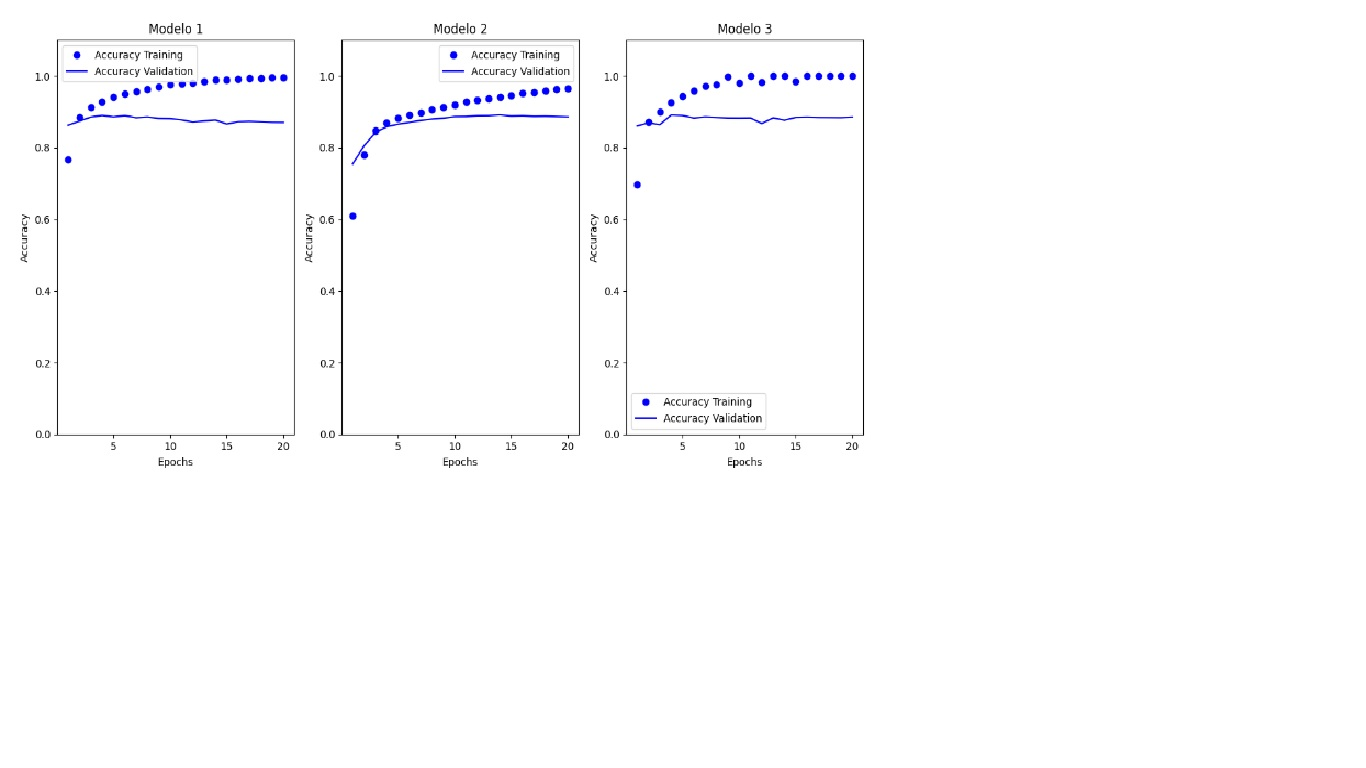

### **Gemini Solución**

**Interpretación de las Gráficas**

Las gráficas presentadas muestran la evolución de la precisión (accuracy) en los conjuntos de entrenamiento y validación a lo largo de las épocas de entrenamiento para tres modelos de redes neuronales diferentes.

*Eje X:* Representa el número de épocas, es decir, las iteraciones completas del conjunto de entrenamiento durante el proceso de aprendizaje.
*Eje Y:* Representa la precisión, que es una métrica que indica qué proporción de las predicciones del modelo son correctas.

**Comportamiento de los Modelos:**

+ Modelo 1: La precisión en el conjunto de entrenamiento aumenta rápidamente en las primeras épocas y luego se estabiliza en un valor alto, mientras que la precisión en el conjunto de validación aumenta inicialmente pero luego comienza a disminuir ligeramente. Esto sugiere que el modelo podría estar comenzando a sobreajustarse a los datos de entrenamiento.

+ Modelo 2: Este modelo muestra una mejora gradual en la precisión tanto en el conjunto de entrenamiento como en el de validación. Sin embargo, la precisión en el conjunto de validación no alcanza el nivel de la precisión en el conjunto de entrenamiento, lo que indica que el modelo podría beneficiarse de un ajuste fino o de más datos de entrenamiento.

+ Modelo 3: El comportamiento de este modelo es similar al del Modelo 1, con un rápido aumento inicial de la precisión en el conjunto de entrenamiento seguido de una ligera disminución en la precisión de validación. Esto también sugiere un posible sobreajuste.

**¿Qué modelo elegirías?**

La elección del mejor modelo dependerá del objetivo específico del problema y de los criterios de evaluación. Sin embargo, basándonos en las gráficas proporcionadas, podemos hacer las siguientes observaciones:

*Modelo 2:* Parece ser el candidato más prometedor. Su comportamiento es más estable y no muestra signos claros de sobreajuste. Sin embargo, podría beneficiarse de un ajuste fino de los hiperparámetros o de más datos de entrenamiento para mejorar su rendimiento.

*Modelos 1 y 3:* Ambos modelos muestran signos de sobreajuste, lo que sugiere que están aprendiendo demasiado los detalles específicos de los datos de entrenamiento y pueden tener dificultades para generalizar a nuevos datos.

Consideraciones adicionales:

*Complejidad del modelo:* Un modelo más complejo (con más capas o neuronas) puede ser capaz de aprender patrones más complejos, pero también es más propenso al sobreajuste.

*Cantidad de datos:* Una mayor cantidad de datos de entrenamiento puede ayudar a reducir el riesgo de sobreajuste y mejorar la generalización del modelo.

*Técnicas de regularización:* Técnicas como el dropout, la regularización L1/L2 o la early stopping pueden ayudar a prevenir el sobreajuste y mejorar el rendimiento del modelo.

*Métricas de evaluación:* Además de la precisión, es importante considerar otras métricas como la precisión, el recall, el F1-score, etc., especialmente en problemas de clasificación desbalanceada.

**Recomendaciones:**

*Ajuste fino del Modelo 2:* Experimentar con diferentes valores de hiperparámetros (tasa de aprendizaje, tamaño del lote, etc.) para mejorar su rendimiento.

*Regularización de los Modelos 1 y 3:* Aplicar técnicas de regularización para reducir el sobreajuste.

*Recopilación de más datos:* Si es posible, obtener más datos de entrenamiento para mejorar la generalización de todos los modelos.

C*omparación con otras métricas:* Evaluar los modelos utilizando diferentes métricas para obtener una visión más completa de su rendimiento.

**En conclusión, el Modelo 2 parece ser la opción más prometedora en base a la información proporcionada. Sin embargo, es importante realizar un análisis más profundo y considerar otros factores antes de tomar una decisión final.**

### **Otra Solución: **

**¿Detectas algún comportamiento llamativo?**

Con respecto al primer modelo, se puede observar que la accuracy para el conjunto de datos de
entrenamiento es 1, pero no converge para el conjunto de validación, indicando así que el
modelo está experimentando un sobreajuste.
En cambio, pasando al segundo modelo, la accuracy no alcanza el 1 en los datos de
entrenamiento, y sí que se aprecia una convergencia para el conjunto de datos de validación.
Por último, con respecto al tercer modelo, la accuracy es 1 en el conjunto de datos de
entrenamiento, pero no converge en el conjunto de validación, de esta forma, se puede concluir
que también experimenta un sobreajuste.

**¿Qué modelo elegirías?**

En base a lo que se ha mencionado en la pregunta anterior, elegiría el segundo modelo, ya que
presenta una mayor probabilidad de obtener mejores resultados para un conjunto de datos
distinto al de entrenamiento, al ser el único que no presenta sobreajuste.

### **Ota Solución (otra versión)**

Si miramos el comportamiento general de estas gráficas vemos que son característcas cuando un modelo presenta overfitting. Por un lado el accuracy de los datos de entrenamiento aumenta linealmente con los epochs, hasta alcanzar casi el 100%, mientras que el accuracy de validación se mantiene alrededor del 85% y de manera constante a lo largo de las epochs.

Yo me quedaría con la segunda gráfica ya que es preferible ver que las curvas de entrenamiento y validación sigan trayectorias similares y converjan a valores altos de precisión. Si ambas curvas son cercanas y tienen valores altos, es probable que el modelo este bien generalizado.